In [63]:
#!gdown 1-71hYGVEWoJH3JTtH9CAsSQ6PotpiZBW

In [64]:
from zipfile import ZipFile
with ZipFile('drive/MyDrive/CombinedNew.zip') as zipObj:
  zipObj.extractall()

In [65]:
import os
import cv2
import shutil
import secrets
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.models import Sequential, Model
from keras import optimizers
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from PIL import Image
from PIL import ImageFile
import seaborn as sns
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input as pre_in2
# from tensorflow.keras.applications.alexnet import AlexNet, preprocess_input

In [66]:
PARENT_PATH = os.getcwd()
DATA_PATH = os.path.join(os.getcwd(),"CombinedNew", "Combined New")
TEST_PATH = os.path.join(DATA_PATH, "test")
TRAIN_PATH = os.path.join(DATA_PATH, "train")
UNSEEN_PATH = os.path.join(DATA_PATH, "unseen")
MODEL_PATH = os.path.join(PARENT_PATH, "models")
NUM_CLASSES = 8

In [67]:
BATCH_SIZE = 64
IMAGE_SIZE = 224
NUM_EPOCH = 40

In [68]:
# PREP_DATA_PATH = os.path.join(os.getcwd(),"Distracted Driver Dataset","Camera 1 - Prep")
# if os.path.exists(PREP_DATA_PATH):
#   shutil.rmtree(PREP_DATA_PATH)
# shutil.copytree(DATA_PATH, PREP_DATA_PATH)

In [69]:
def create_df(DATA_PATH):
  cls_names = os.listdir(DATA_PATH)
  data = []
  for cls in cls_names: 
    if cls == ".DS_Store":
      continue
    cls_path = os.path.join(DATA_PATH, cls)
    print(cls_path)
    for file in os.listdir(cls_path):
      data.append({"Filename": os.path.join(cls, file), "Class": cls})
  df = pd.DataFrame(data)
  return df
  
train_df = create_df(TRAIN_PATH)
test_df = create_df(TEST_PATH)

/content/CombinedNew/Combined New/train/c5
/content/CombinedNew/Combined New/train/c1
/content/CombinedNew/Combined New/train/c7
/content/CombinedNew/Combined New/train/c4
/content/CombinedNew/Combined New/train/c0
/content/CombinedNew/Combined New/train/c3
/content/CombinedNew/Combined New/train/c6
/content/CombinedNew/Combined New/train/c2
/content/CombinedNew/Combined New/test/c5
/content/CombinedNew/Combined New/test/c1
/content/CombinedNew/Combined New/test/c7
/content/CombinedNew/Combined New/test/c4
/content/CombinedNew/Combined New/test/c0
/content/CombinedNew/Combined New/test/c3
/content/CombinedNew/Combined New/test/c6
/content/CombinedNew/Combined New/test/c2


<Axes: >

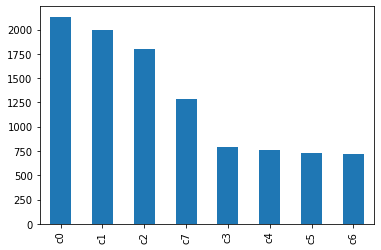

In [70]:
train_df['Class'].value_counts().plot.bar()

<Axes: >

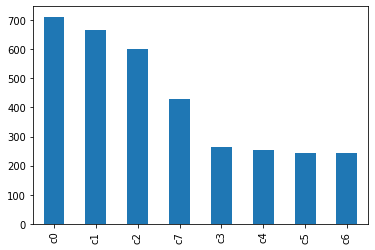

In [71]:
test_df['Class'].value_counts().plot.bar()

In [72]:
# def duplicateImg(file):
#   filepath = os.path.join(cls_path, file)
#   new_filepath = os.path.join(cls_path, "new" + file)
#   shutil.copy(filepath, new_filepath)
  
# PREP_TRAIN_PATH = os.path.join(PREP_DATA_PATH, "train")
# PREP_TEST_PATH = os.path.join(PREP_DATA_PATH, "test")
# modify_cls = [ "c2", "c3", "c4", "c5", "c6" , "c7", "c8"]
# for cls in modify_cls:
#   cls_path = os.path.join(PREP_TRAIN_PATH, cls)
#   for file in os.listdir(cls_path): 
#     if (cls != "c2" or cls != "c4"):
#       duplicate = secrets.randbelow(10)
#       if duplicate < 8:
#         duplicateImg(file)
#     else:
#       duplicate = secrets.randbelow(4)
#       if duplicate < 2:
#         duplicateImg(file)

In [73]:
# PREP_TRAIN_PATH = os.path.join(PREP_DATA_PATH, "train")
# PREP_TEST_PATH = os.path.join(PREP_DATA_PATH, "test")
# def dropImg(file):
#   filepath = os.path.join(cls0_path, file)
#   os.remove(filepath)
# cls0_path = os.path.join(PREP_TRAIN_PATH, 'c0')
# for file in os.listdir(cls0_path): 
#   duplicate = secrets.randbelow(2)
#   if duplicate < 1:
#     dropImg(file)

In [74]:
# prep_train_df = create_df(PREP_TRAIN_PATH)
# prep_test_df = create_df(PREP_TEST_PATH)

In [75]:
# prep_train_df['Class'].value_counts().plot.bar()

In [76]:
# prep_test_df['Class'].value_counts().plot.bar()

In [77]:
gen_per_image = 1
gen_per_class = 200
rotation_range = 5
width_shift_range = 0.02
height_shift_range = 0.02
shear_range = 0.01
zoom_range = 0.05
horizontal_flip = False
fill_mode = "nearest"

In [78]:
# for inc
datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = rotation_range,
        width_shift_range = width_shift_range,
        height_shift_range = height_shift_range,
        shear_range = shear_range,
        zoom_range = zoom_range,
        horizontal_flip = horizontal_flip,
        fill_mode = fill_mode,
        validation_split = 0.2,
        preprocessing_function = preprocess_input)

unseen_datagen = ImageDataGenerator(
        rescale = 1./255,
)

train_data = datagen.flow_from_directory(TRAIN_PATH,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        class_mode='categorical')

valid_data = datagen.flow_from_directory(TEST_PATH,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=BATCH_SIZE,
                                        shuffle=True)
unseen_data = unseen_datagen.flow_from_directory(UNSEEN_PATH,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=BATCH_SIZE,
                                        shuffle=False)

Found 10225 images belonging to 8 classes.
Found 3414 images belonging to 8 classes.
Found 839 images belonging to 8 classes.


In [79]:
classes = [i for i in range(8)]
print(classes)

[0, 1, 2, 3, 4, 5, 6, 7]


In [80]:
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=train_data.classes)
class_weights = dict(enumerate(class_weights.flatten(), 0))
print(class_weights)

{0: 0.5997770999530737, 1: 0.6390625, 2: 0.7081024930747922, 3: 1.615834386852086, 4: 1.6773293963254594, 5: 1.7605027548209367, 6: 1.7678077455048409, 7: 0.9931041181041181}


In [81]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
for layer in base_model.layers:
    layer.trainable = False

In [82]:
vgg16_fine_tuned = Sequential()
vgg16_fine_tuned.add(GlobalAveragePooling2D(input_shape=base_model.output_shape[1:]))
# inceptionv3_fine_tuned.add(Dense(256, activation='relu', kernel_initializer='glorot_normal'))
vgg16_fine_tuned.add(Dense(8, activation='softmax', kernel_initializer='glorot_normal'))
vgg16_fine_tuned = Model(inputs = base_model.input, outputs = vgg16_fine_tuned(base_model.output))

vgg16_fine_tuned.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [83]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
vgg16_fine_tuned.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

# New Section

In [84]:
filepath = os.path.join(MODEL_PATH,"distracted_vgg16_best.hdf5")
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True,mode='max',period=1)
callbacks_list = [checkpoint]

In [85]:
model_history = vgg16_fine_tuned.fit(train_data,validation_data = valid_data,epochs=NUM_EPOCH, shuffle=True,callbacks=callbacks_list, class_weight=class_weights)

Epoch 1/40
160/160 [==============================] - ETA: 0s - loss: 2.0513 - accuracy: 0.1917
Epoch 1: val_accuracy improved from -inf to 0.19361, saving model to /content/models/distracted_vgg16_best.hdf5
160/160 [==============================] - 442s 3s/step - loss: 2.0513 - accuracy: 0.1917 - val_loss: 2.0276 - val_accuracy: 0.1936
Epoch 2/40
160/160 [==============================] - ETA: 0s - loss: 1.9374 - accuracy: 0.3228
Epoch 2: val_accuracy improved from 0.19361 to 0.36438, saving model to /content/models/distracted_vgg16_best.hdf5
160/160 [==============================] - 427s 3s/step - loss: 1.9374 - accuracy: 0.3228 - val_loss: 1.8757 - val_accuracy: 0.3644
Epoch 3/40
160/160 [==============================] - ETA: 0s - loss: 1.8480 - accuracy: 0.3927
Epoch 3: val_accuracy improved from 0.36438 to 0.41769, saving model to /content/models/distracted_vgg16_best.hdf5
160/160 [==============================] - 426s 3s/step - loss: 1.8480 - accuracy: 0.3927 - val_loss: 1.81

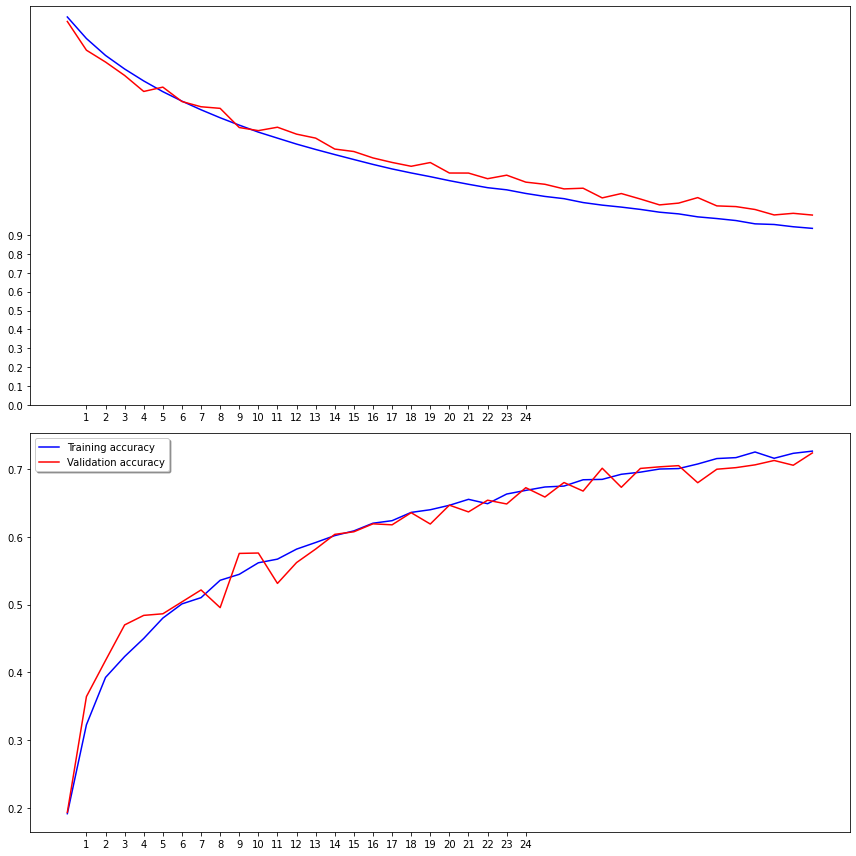

In [86]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(model_history.history['loss'], color='b', label="Training loss")
ax1.plot(model_history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 25, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(model_history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(model_history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 25, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [87]:
vgg16_fine_tuned.load_weights('models/distracted_vgg16_best.hdf5')

In [88]:
# evaluate_data = datagen.flow_from_directory(PREP_TEST_PATH,
#                                         target_size=(IMAGE_SIZE,IMAGE_SIZE),
#                                         batch_size=BATCH_SIZE,shuffle=False)

In [89]:
ypred = vgg16_fine_tuned.predict(unseen_data)

evaluate_list = unseen_data.classes.tolist()

ypred_class = np.argmax(ypred,axis=1)
ytest = evaluate_list

14/14 [==============================] - 15s 1s/step


In [90]:
accuracy = accuracy_score(ytest,ypred_class)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(ytest, ypred_class,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(ytest,ypred_class,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(ytest,ypred_class,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.249106
Precision: 0.150176
Recall: 0.249106
F1 score: 0.141416


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
vgg16_fine_tuned.evaluate(unseen_data)

14/14 [==============================] - 14s 974ms/step - loss: 2.5117 - accuracy: 0.2491


[2.5116868019104004, 0.24910607933998108]

In [92]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig.savefig(os.path.join(MODEL_PATH,"confusion_matrix.png"))
    return fig
def print_heatmap(n_labels, n_predictions, class_names):
    labels = n_labels #sess.run(tf.argmax(n_labels, 1))
    predictions = n_predictions #sess.run(tf.argmax(n_predictions, 1))

#     confusion_matrix = sess.run(tf.contrib.metrics.confusion_matrix(labels, predictions))
    matrix = confusion_matrix(labels,predictions.argmax(axis=1))
    row_sum = np.sum(matrix, axis = 1)
    w, h = matrix.shape

    c_m = np.zeros((w, h))

    for i in range(h):
        c_m[i] = matrix[i] * 100 / row_sum[i]

    c = c_m.astype(dtype = np.uint8)

    
    heatmap = print_confusion_matrix(c, class_names, figsize=(18,10), fontsize=20)

In [93]:
class_names = list()
for name,idx in valid_data.class_indices.items():
    class_names.append(name)
print(class_names)

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7']


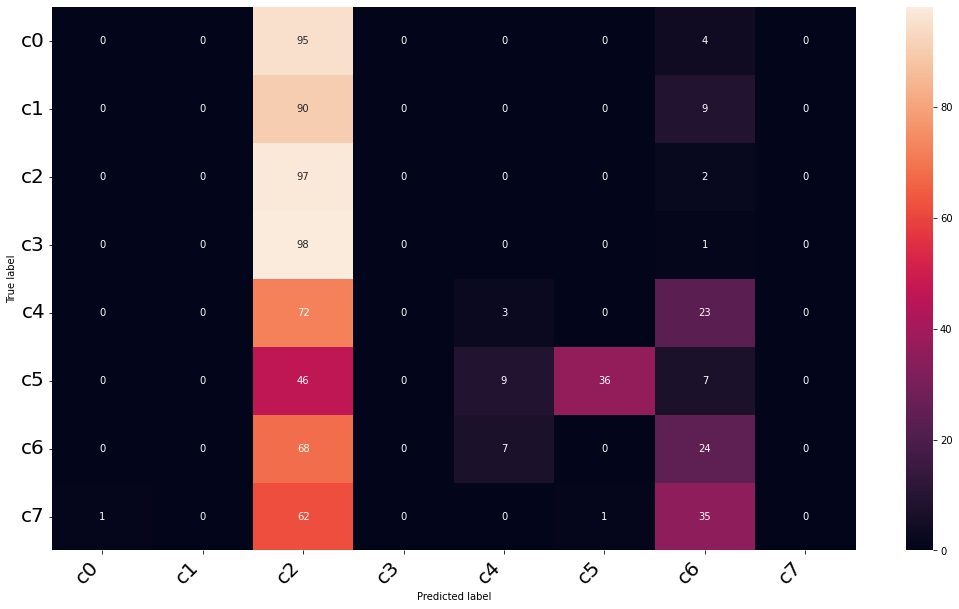

In [94]:
print_heatmap(ytest,ypred,class_names)